In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def find(i):
    if ptr[i] < 0:
        return i
    else:
        ptr[i] = find(ptr[i])
        return ptr[i]

def union(r1, r2, big):
    if r2 != r1:
        if ptr[r1] > ptr[r2]:
            ptr[r2] += ptr[r1]
            ptr[r1] = r2
            r1 = r2
        else:
            ptr[r1] += ptr[r2]
            ptr[r2] = r1
        if -ptr[r1] > big:
            big = -ptr[r1]
    return r1, r2, big

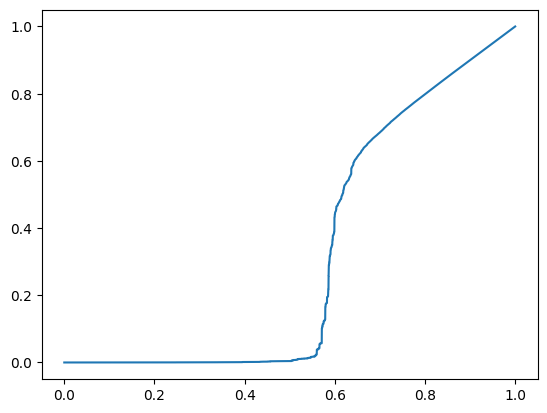

In [5]:
import numpy as np

def find(i):
    if ptr[i] < 0:
        return i
    else:
        ptr[i] = find(ptr[i])
        return ptr[i]

def union(r1, r2, big):
    if r2 != r1:
        if ptr[r1] > ptr[r2]:
            ptr[r2] += ptr[r1]
            ptr[r1] = r2
            r1 = r2
        else:
            ptr[r1] += ptr[r2]
            ptr[r2] = r1
        if -ptr[r1] > big:
            big = -ptr[r1]
    return r1, r2, big

L = 256
N = L * L

order = np.empty(N, int)
ptr = np.empty(N, int)

for i in range(N):
    order[i] = i
np.random.shuffle(order)

big = 0
big_list = []
for i in range(N):
    ptr[i] = -N - 1


nn = np.empty([N, 4], int)
for i in range(N):
    row, col = divmod(i, L)
    nn[i, 0] = (row - 1) * L + col if row > 0 else -1
    nn[i, 1] = (row + 1) * L + col if row < L - 1 else -1
    nn[i, 2] = row * L + (col - 1) if col > 0 else -1
    nn[i, 3] = row * L + (col + 1) if col < L - 1 else -1
for i in range(N):
    r1, s1 = order[i], order[i]
    ptr[s1] = -1
    for j in range(4):
        s2 = nn[s1, j]
        if s2 != -1 and ptr[s2] != -N - 1:
            r2 = find(s2)
            r1, r2, big = union(r1, r2, big)
    big_list.append(big/N)

x_list = [(i+1)/N for i in range(N)]

plt.plot(x_list, big_list)
plt.show()